# What words are most frequently mentioned by philosophers？

## This report is about interesting findings from kaggle philosophy_data aims for knowing frequency of words mentioned the most by different schools and different authors.

The dataset contains over 300,000 sentences from over 50 texts spanning 10 major schools of philosophy. The represented schools are: Plato, Aristotle, Rationalism, Empiricism, German Idealism, Communism, Capitalism, Phenomenology, Continental Philosophy, and Analytic Philosophy.

This report is prepared with the following environmental settings.

In [1]:
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install wordcloud
import pandas as pd
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import scipy.stats as stats
import statsmodels.stats.multicomp as mult
import re
import warnings

warnings.filterwarnings('ignore')

I process the raw data 'philosophy_data.csv' and then I split it into three subdata by three didferent philosophers saved in data file.


### 1.Comparison of words frequency between philosophers

We can use histograms to display the word frequency to compare the data.

Choosing three of my favorite philosophers: Aristotle(School:Aristotle), Ricardo(School:Capitalisim) and Plato(School:Plato).

By cleaning data, I removed stopwords and created a tidy dataframe and converted dataframe into list.  

The histograph might imply for Ricardo, the type of words tend to be values in economy since the title in the corpus for Ricardo is On The Principles Of Political Economy And Taxation. Below is the histogram to display the Ricardo word frequency.

In [2]:
df=pd.read_csv('philosophy_data.csv')
df_new=df[['author','sentence_str']]
df1=df_new.loc[df_new['author']=='Aristotle']

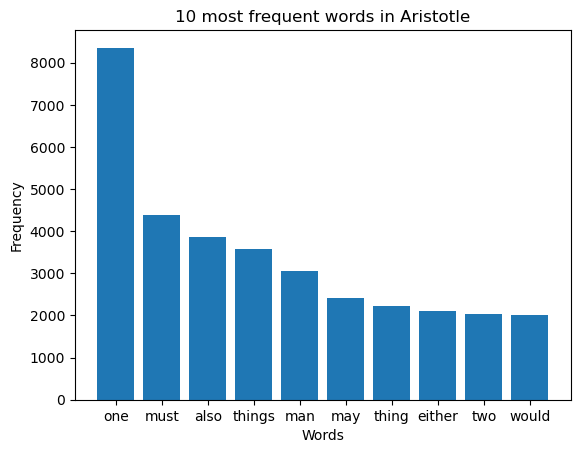

In [9]:
import pandas as pd
import nltk.corpus
#nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')+['.','it','a']
df1['sentence_str_lower'] = df1['sentence_str'].str.lower()
df1['clean'] = df1['sentence_str_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
word_list=df1['clean'].values.tolist()

# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(" ".join(word_list).split()).most_common(10)

# `most_common` returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.bar(words, counts)
plt.title("10 most frequent words in Aristotle")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

The graph above shows that "one", "must", "also", "things", "man", "may", "say", "thing", "either", "two", and "would" are mentioned frequently by Aristotle.

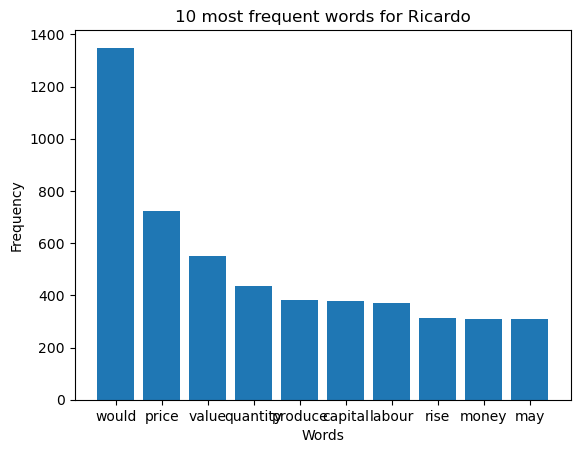

In [4]:
df2 = pd.read_csv('/Users/xuefei/Desktop/Ricardo.csv')
df2=df_new.loc[df_new['author']=='Ricardo']

df2['sentence_str_lower'] = df2['sentence_str'].str.lower()

stop_words = stopwords.words('english')+['.','it','a','the']
df2['clean'] = df2['sentence_str_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

word_list2=df2['clean'].values.tolist()

# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(" ".join(word_list2).split()).most_common(10)

# `most_common` returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.bar(words, counts)
plt.title("10 most frequent words for Ricardo")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()


The graph above is easy to find out that "would", "price", "value", "quantity", "produce", "capital", "labour", "rise", "money", "may" have the highest frequency in the corpus.

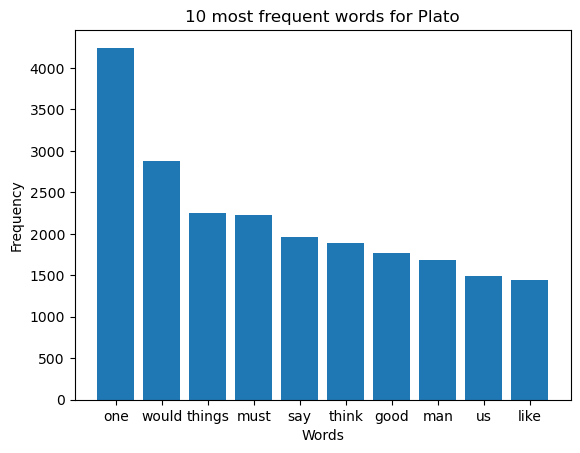

In [5]:

df3=df_new.loc[df_new['author']=='Plato']
df3['sentence_str_lower'] = df3['sentence_str'].str.lower()
stop_words = stopwords.words('english')+['.','it','a','the']
df3['lower'] = df3['sentence_str_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df3['clean'] = df3['lower'].apply(lambda x: ' '.join([word for word in x.split() if word.isalnum()]))
word_list3=df3['clean'].values.tolist()
# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(" ".join(word_list3).split()).most_common(10)

# `most_common` returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.bar(words, counts)
plt.title("10 most frequent words for Plato")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

The graph above presents words "one", "would", "things", "must", "say", think", "good", "man", "us", and "like" mentioned the most frequently.

By comparing three philosophers, we can clearly see the difference between Ricardo, Plato and Aristotle by words frequency used in their articles. Ricardo is more empirical since he mentioned more words like "price", "quantity", "labour". Plato's work is more like a dialogue since he mentioned more words like "good", "think", "us", and "man" which echoes his style.

The words mentioned by Aristotle and Plato are more likely, such as "thing", "man", "must", "one" and "would". I would assume the style of Aristotle's work might be similar as Plato's.

In conclusion, from the word frequency, we can roughly estimate the style of philosopher.

### 2.Among three famous philosophers, which words they used frequently?

From the first section, we notice that for Plato, he used words "say", "good", "man", "think" the most frequently.
For Ricardo, he used "price", "value", "labour" frequently. However, if we use the wordcloud and cleaning the data, will the result be the same? In addition, which words have presented in all three philosophers' word cloud?

Below is the data frame I made for each philosopher. I extract them from the big dataset.

There are 4576959 words in the combination of all cells in column Text.


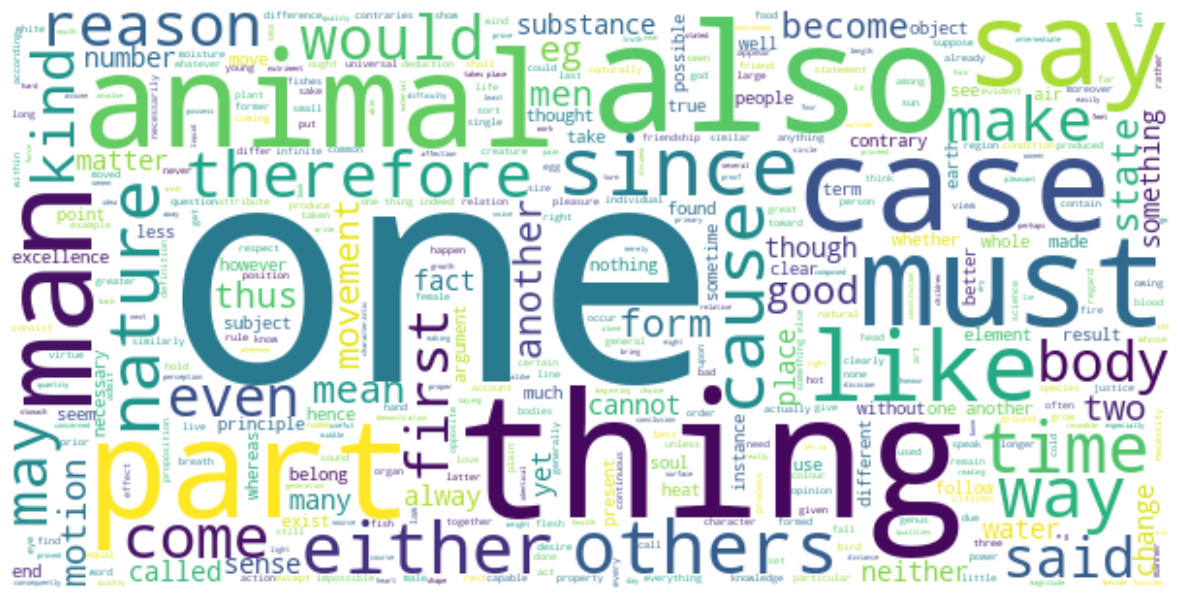

In [6]:
from wordcloud import WordCloud
# for preprocessing
import nltk
#from nltk.probability import FreqDist
from nltk.corpus import stopwords
#from nltk import word_tokenize
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.cluster import MiniBatchKMeans, KMeans
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE

import pprint
pp = pprint.PrettyPrinter()
import collections
from collections import Counter

# Data Cleaning 
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('wordnet')
nltk_stopwords = stopwords.words('english')
comment_words = ''
#stopwords = set(STOPWORDS)
text_1 = " ".join(text for text in word_list)
print ("There are {} words in the combination of all cells in column Text.".format(len(text_1)))

# Generate a word cloud image

wordcloud = WordCloud(stopwords =nltk_stopwords, background_color="white", width=600, height=300,max_words=1000).generate(text_1)

# Display the generated image:

# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('Aristotle_wc.png')

There are 375275 words in the combination of all cells in column Text.


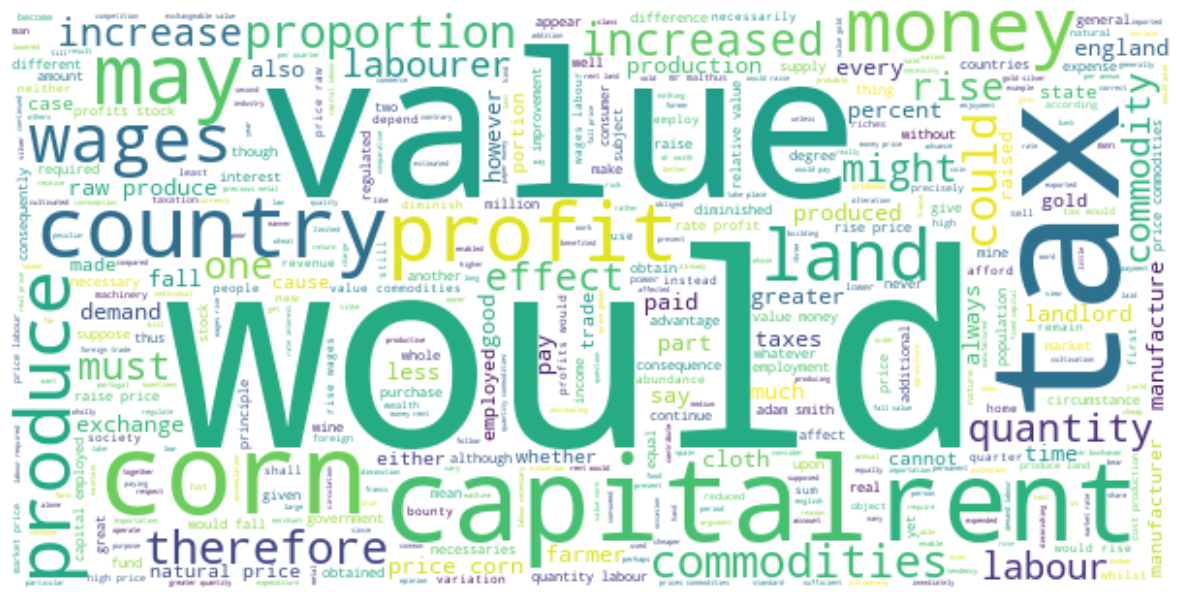

In [154]:

#stopwords = set(STOPWORDS)
text_2 = " ".join(text for text in word_list2)
print ("There are {} words in the combination of all cells in column Text.".format(len(text_2)))

# Generate a word cloud image

wordcloud = WordCloud(stopwords =nltk_stopwords, background_color="white", width=600, height=300,max_words=1000).generate(text_2)

# Display the generated image:

# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('Ricardo_wc.png')

There are 1899821 words in the combination of all cells in column Text.


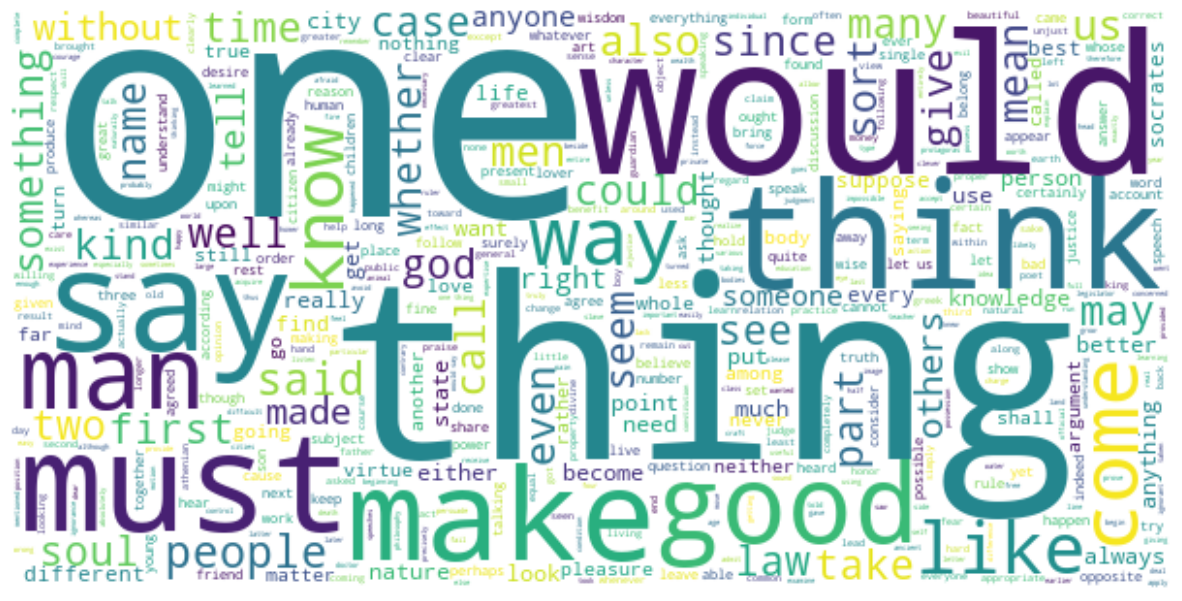

In [155]:

#stopwords = set(STOPWORDS)
text_3 = " ".join(text for text in word_list3)
print ("There are {} words in the combination of all cells in column Text.".format(len(text_3)))

# Generate a word cloud image

wordcloud = WordCloud(stopwords =nltk_stopwords, background_color="white", width=600, height=300,max_words=1000).generate(text_3)

# Display the generated image:

# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('Plato_wc.png')

By comparing these three graphs, we can find that words mentioned grequently by Aristotle and Plato are more likely. The words are "say", "thing", "must", "one", "man", and "good". For Ricardo, the words used by him seems to be different from other two philosophers. They are "would", "price", "wages", "value" and "labour".   
### Words "one", "would" mentiened frequently by all three philosophers.

## 3.Compare words frequency mentioned by different schools 

By using histogram and word cloud, we can find out what words mentioned frequently by different shcools.  
Then we can compare the words mentioned frequently by different shcools and authors.

In [7]:
df=pd.read_csv('/Users/xuefei/Desktop/philosophy_data.csv')
df.head(10)
df4=df[['school','sentence_str']]
df4.head(10)
df5=df4.loc[df4['school']=='aristotle']
df5['sentence_str_lower'] = df5['sentence_str'].str.lower()

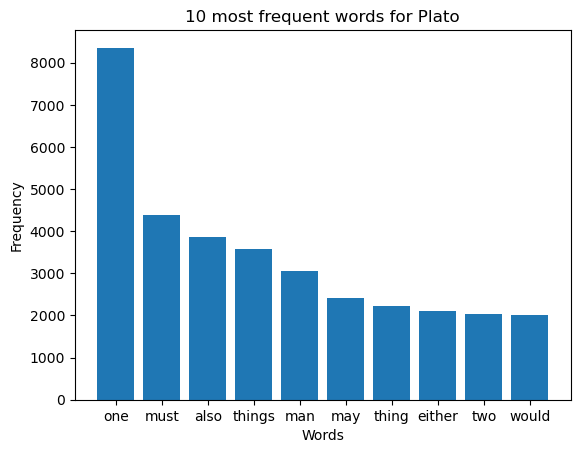

In [8]:
df5['sentence_str_lower'] = df5['sentence_str'].str.lower()
stop_words = stopwords.words('english')+['.','it','a','the']
df5['lower'] = df5['sentence_str_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df5['clean'] = df5['lower'].apply(lambda x: ' '.join([word for word in x.split() if word.isalnum()]))
word_list5=df5['clean'].values.tolist()
# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(" ".join(word_list5).split()).most_common(10)

# `most_common` returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.bar(words, counts)
plt.title("10 most frequent words for Plato")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()





There are 3266912 words in the combination of all cells in column Text.


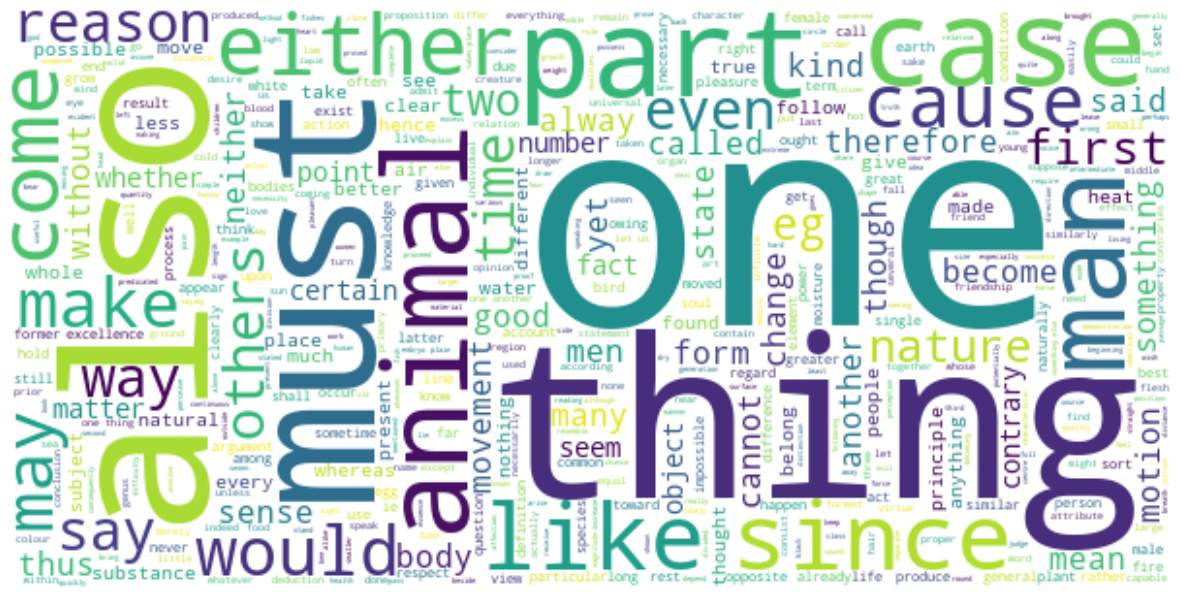

In [144]:
text_5 = " ".join(text for text in word_list5)
print ("There are {} words in the combination of all cells in column Text.".format(len(text_5)))

# Generate a word cloud image

wordcloud = WordCloud(stopwords =nltk_stopwords, background_color="white", width=600, height=300,max_words=1000).generate(text_5)

# Display the generated image:

# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('Aristotle_wc.png')

For the school "Aristotle", words "one", "must", "also", "things", and "man" are mentioned the most frequently.

/var/folders/7f/k8flrtsj7hj5bcvsk6xyz27c0000gn/T/ipykernel_1123/1401715135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['sentence_str_lower'] = df6['sentence_str'].str.lower()
/var/folders/7f/k8flrtsj7hj5bcvsk6xyz27c0000gn/T/ipykernel_1123/1401715135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['lower'] = df6['sentence_str_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
/var/folders/7f/k8flrtsj7hj5bcvsk6xyz27c0000gn/T/ipykernel_1123/140171513

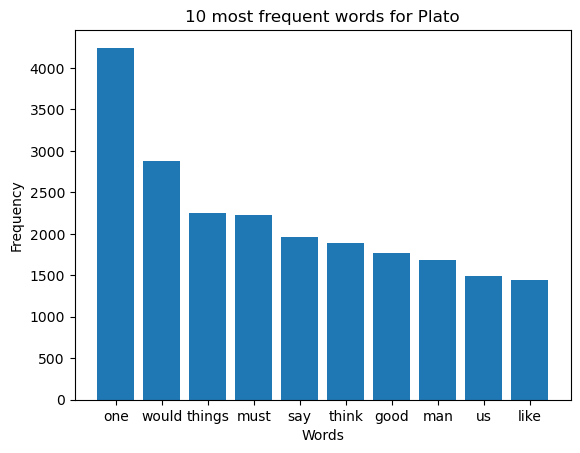

In [146]:
df6 =df4.loc[df4['school']=='plato']
df6['sentence_str_lower'] = df6['sentence_str'].str.lower()
stop_words = stopwords.words('english')+['.','it','a','the']
df6['lower'] = df6['sentence_str_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df6['clean'] = df6['lower'].apply(lambda x: ' '.join([word for word in x.split() if word.isalnum()]))
word_list6=df6['clean'].values.tolist()
# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(" ".join(word_list6).split()).most_common(10)

# `most_common` returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.bar(words, counts)
plt.title("10 most frequent words for Plato")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

There are 1899821 words in the combination of all cells in column Text.


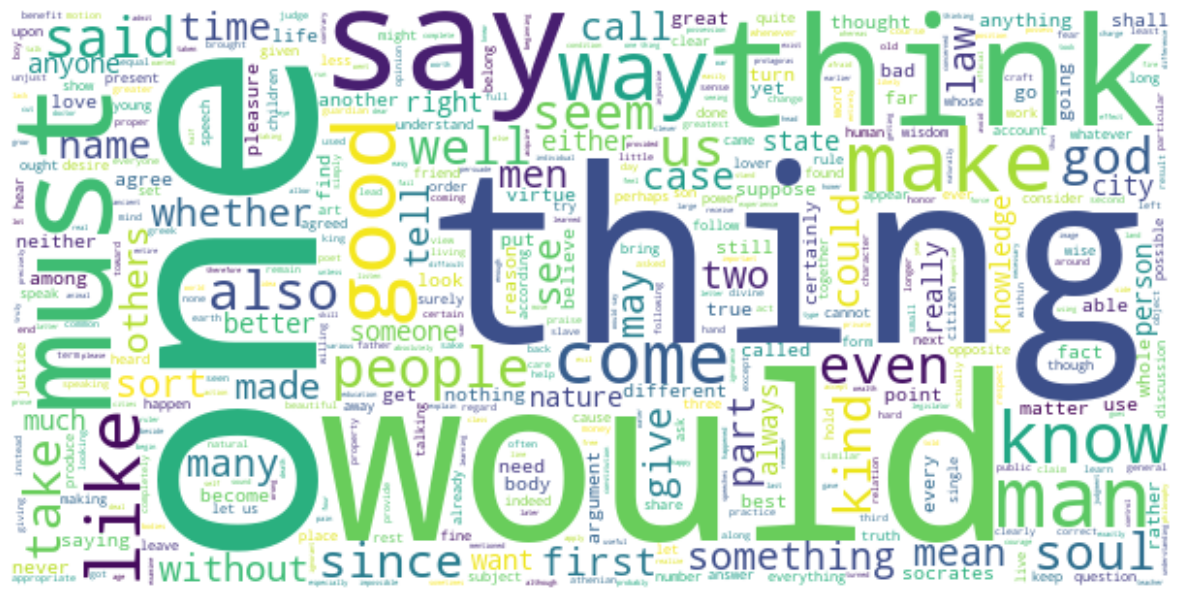

In [147]:
text_6 = " ".join(text for text in word_list6)
print ("There are {} words in the combination of all cells in column Text.".format(len(text_6)))

# Generate a word cloud image

wordcloud = WordCloud(stopwords =nltk_stopwords, background_color="white", width=600, height=300,max_words=1000).generate(text_6)

# Display the generated image:

# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('Plato_wc.png')

For the shcool "Plato", words "one", "would", "thing", "must", "say", "think", "good", and "man" mentioned the most.

/var/folders/7f/k8flrtsj7hj5bcvsk6xyz27c0000gn/T/ipykernel_1123/4162397846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['sentence_str_lower'] = df7['sentence_str'].str.lower()
/var/folders/7f/k8flrtsj7hj5bcvsk6xyz27c0000gn/T/ipykernel_1123/4162397846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['lower'] = df7['sentence_str_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
/var/folders/7f/k8flrtsj7hj5bcvsk6xyz27c0000gn/T/ipykernel_1123/416239784

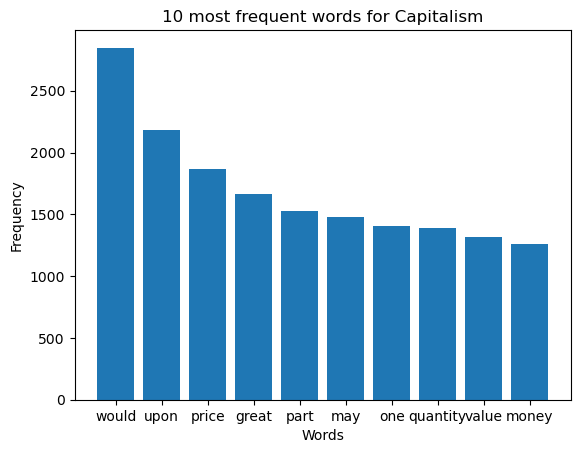

In [149]:
df7 =df4.loc[df4['school']=='capitalism']
df7['sentence_str_lower'] = df7['sentence_str'].str.lower()
stop_words = stopwords.words('english')+['.','it','a','the']
df7['lower'] = df7['sentence_str_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df7['clean'] = df7['lower'].apply(lambda x: ' '.join([word for word in x.split() if word.isalnum()]))
word_list7=df7['clean'].values.tolist()
# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(" ".join(word_list7).split()).most_common(10)

# `most_common` returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.bar(words, counts)
plt.title("10 most frequent words for Capitalism")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

There are 1648398 words in the combination of all cells in column Text.


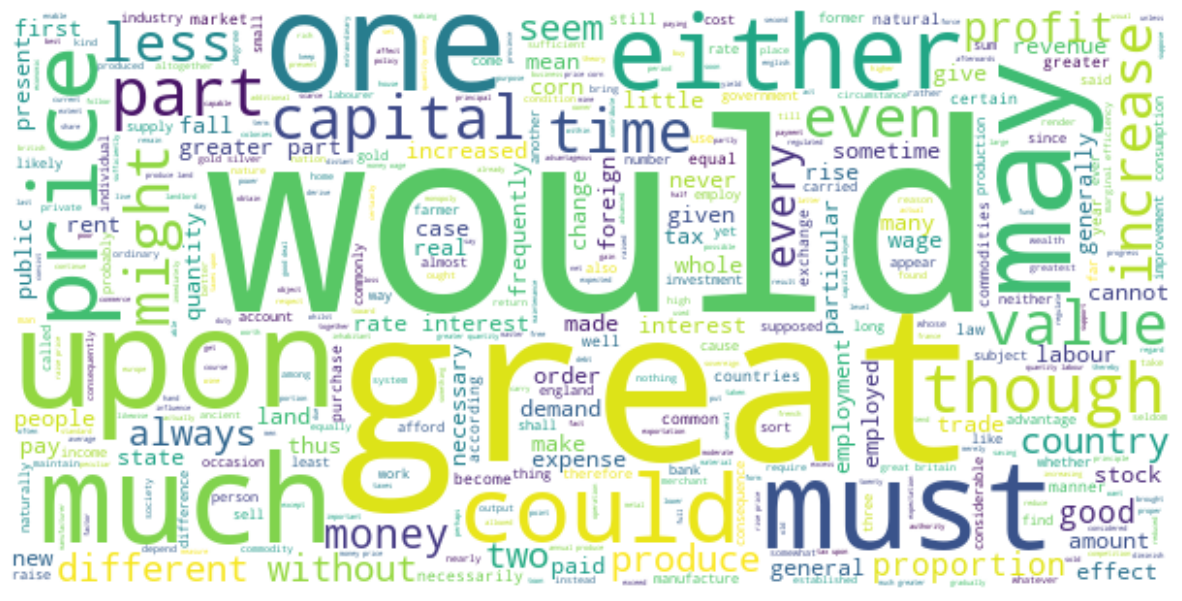

In [150]:
text_7 = " ".join(text for text in word_list7)
print ("There are {} words in the combination of all cells in column Text.".format(len(text_7)))

# Generate a word cloud image

wordcloud = WordCloud(stopwords =nltk_stopwords, background_color="white", width=600, height=300,max_words=1000).generate(text_7)

# Display the generated image:

# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('Plato_wc.png')

For school "Capitalism", words "would", "upon", "price", "great", "part", "may", "one", "quantity", "value", and "money" mentioned the most frequently.

By comparison, the words mentioned frequently in school "Aristotle" and school "Plato" are more likely. In addition, some words presented frequently in school "Capitalism" are also similar in school "Aristotle" and school "Plato".

# Conclusion

1.By comparing the histograms of words frequency, we can roughly estimate the styles of each philosopher. As words mentioned by Aristotle and Plato are similar, then their styles tend to be a dialogue ranther than a debate. The Ricardo's style is more empirical by analysing those words mentioned by him.

2.By comparing the word clouds, among the three famous philosophers' mentioned words, "thing", "would", "may", "think", "say" are mentioned frequently. This deviates my expectation since when we mentioned philosophy, the first couple of words pop up to my mind are "correct", "right", "true", "false" which tend to be argumentative words. However, these words are more likely to show up in a diaogue.   

3.By comparing words mentioned by different schools of philosophy, we can roughly think that two authors' styles are similar since words presented frquently in schools which two philosophers belongs to are more likely to be the same.  

4.An interesting finding, based on three philosophers and three different schools, word mentioned the most by all of them is "**would**".

